                               Company Name    company contact  \
0                            1 State Street      David Neiburg   
1                            100 Church LLC  Edward A. Carroll   
2                      100 Wall Investments       Jerry Branam   
3               1-10 Bush Terminal Owner LP     Andrew Kimball   
4  120 Broadway Acquisitions JV, LLC (Ldmk)        Carl Letich   

               company email company phone                Address      City  \
0     eskoblo@energyspec.com    7186779077          1114 Avenue J  Brooklyn   
1                        NaN    2125663000      100 Church Street        NY   
2                        NaN    2122487160         96 Wall Street  New York   
3  akimball@industrycity.com    3474178429  220 36th St, Suite 2A  Brooklyn   
4      clettich@silvprop.com    2124064020           120 Broadway  New York   

  State  Postcode    Industry  \
0    NY     11230  Commercial   
1    NY     10007  Commercial   
2    NY     10005    Landlord

C:\Users\Yerlan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


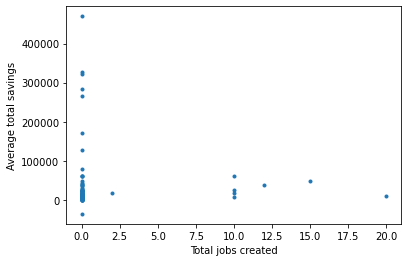

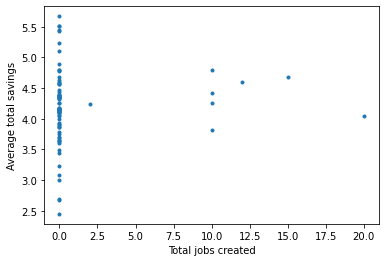

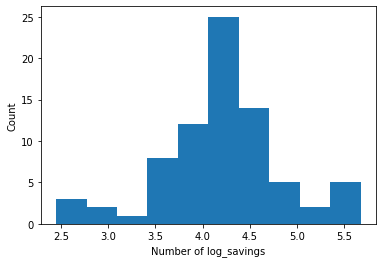

    month  Job created
0       1            0
1       2           27
2       3           20
3       4            2
4       5            2
5       6           63
6       7           20
7       8            0
8       9            0
9      10            0
10     11            5
11     12           10


C:\Users\Yerlan\AppData\Local\Temp/ipykernel_21168/3491737405.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mnthly_jobs['Job created'] = df_mnthly_jobs['Job created'].fillna(0).astype(int)
C:\Users\Yerlan\AppData\Local\Temp/ipykernel_21168/3491737405.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mnthly_jobs['month'] = pd.to_datetime(df_mnthly_jobs['Effective Date']).dt.month


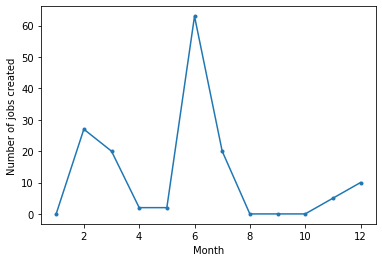

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
print(df.head())
print(df.columns)
print(df.shape)
print(df.info())

#How many different companies are represented in the data set
df_unique = df['Company Name'].unique()
print('Number of companies represented in the data set:', df_unique.shape[0])

#What is the total number of jobs created for businesses in Queens?
jobs_created = df.groupby('Borough')['Job created'].agg(sum).astype(int)
print('Total Number of jobs created in Queens:', jobs_created[3])

#How many different unique email domains names are there in the data set?
df_emails = df['company email'].str.split(pat='@', expand=True)
print('Number of unique email domain names in the data set:', df_emails[1].unique().shape[0])

#Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
df_nta = df.groupby('NTA').agg({'Company Name': 'count', 'Total Savings': 'mean', 'Job created': 'sum'}).reset_index()
print(df_nta[df_nta['Company Name'] >= 5])
df_nta.to_csv('NTAs_with_at_least_5_businesses.cvs')

#Scatter plot of jobs created versus average savings
avg_savings = df_nta['Total Savings']
ln_avg_savings = np.log10(avg_savings)
job_created = df_nta['Job created']
_ = plt.plot(job_created, avg_savings, marker='.', linestyle='none')
_ = plt.xlabel('Total jobs created')
_ = plt.ylabel('Average total savings')
plt.show()

#Scatter plot of jobs created versus logarithmic scale of average savings
ln = plt.plot(job_created, ln_avg_savings, marker='.', linestyle='none')
ln = plt.xlabel('Total jobs created')
ln = plt.ylabel('Average total savings')
plt.show()

#Histogram of the log of the average total savings
plt.hist(ln_avg_savings)
plt.xlabel('Number of log_savings')
plt.ylabel('Count')
plt.show()
plt.clf()

#Line plot of the total jobs created for each month
df_mnthly_jobs = df[['Effective Date', 'Job created']]
df_mnthly_jobs['Job created'] = df_mnthly_jobs['Job created'].fillna(0).astype(int)
df_mnthly_jobs['month'] = pd.to_datetime(df_mnthly_jobs['Effective Date']).dt.month
df_1 = df_mnthly_jobs.groupby('month')['Job created'].agg(sum).reset_index()
print(df_1)
plt.plot(df_1['month'], df_1['Job created'], marker='.')
plt.xlabel('Month')
plt.ylabel('Number of jobs created')
plt.show()
